In [25]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from wordcloud import WordCloud

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [2]:
data_train=pd.read_csv("/content/twitter_training.csv")
data_val=pd.read_csv("/content/twitter_validation.csv")


In [3]:
data_train.head()
data_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [4]:
data_train.columns = ["ID", "Entity", "Sentiment", "Tweet"]
data_val.columns = ["ID", "Entity", "Sentiment", "Tweet"]

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.strip()

In [7]:
data_train["Clean_Tweet"] = data_train["Tweet"].astype(str).apply(clean_text)
data_val["Clean_Tweet"] = data_val["Tweet"].astype(str).apply(clean_text)

In [15]:
positive_words = ["good", "great", "excellent", "happy", "love", "awesome", "best", "amazing"]
negative_words = ["bad", "terrible", "hate", "worst", "sad", "awful", "horrible", "angry"]

In [22]:
def get_sentiment(text):
    positive_words = ["good", "great", "excellent", "happy", "love", "awesome", "best", "amazing"]
    negative_words = ["bad", "terrible", "hate", "worst", "sad", "awful", "horrible", "angry"]

    words = text.split()
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)

    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"



In [23]:
data_train["Predicted_Sentiment"] = data_train["Clean_Tweet"].apply(get_sentiment)


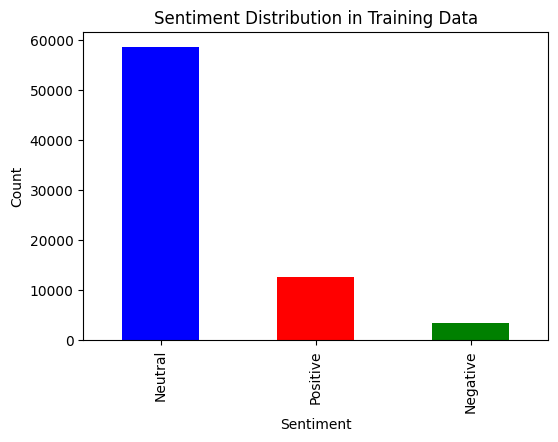

In [30]:
plt.figure(figsize=(6,4))
data_train["Predicted_Sentiment"].value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Training Data")
plt.show()


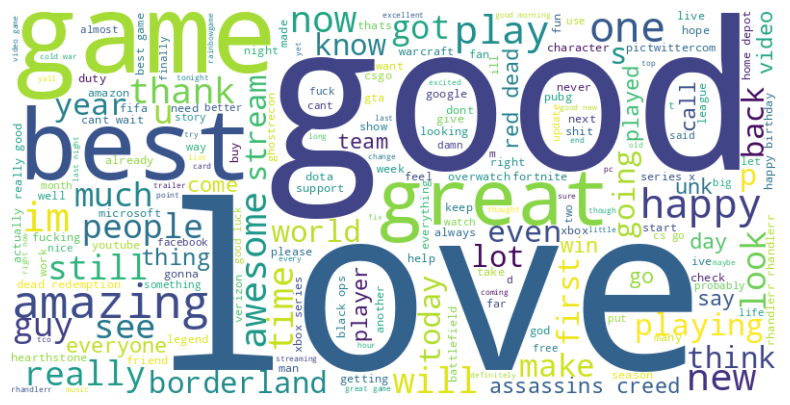

In [33]:
text = " ".join(data_train[data_train["Predicted_Sentiment"] == "Positive"]["Clean_Tweet"])
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


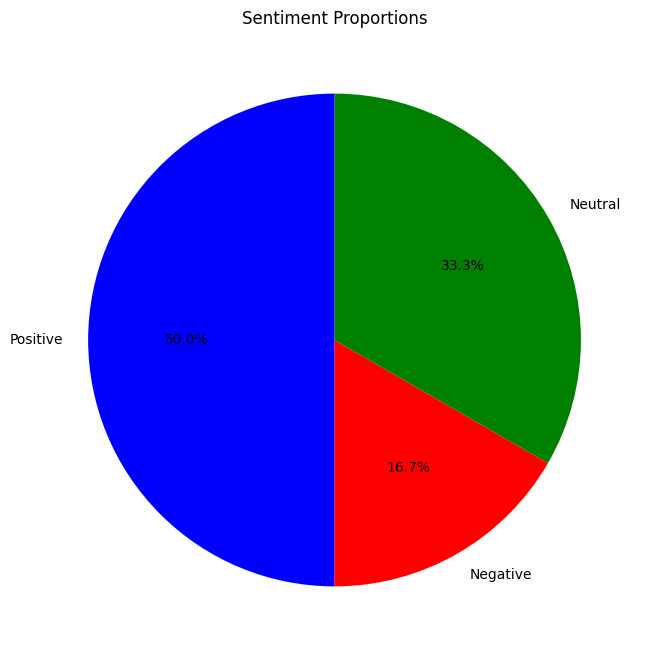

In [29]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative', 'Neutral']
sizes = [150, 50, 100]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'green'])
plt.title('Sentiment Proportions')
plt.show()


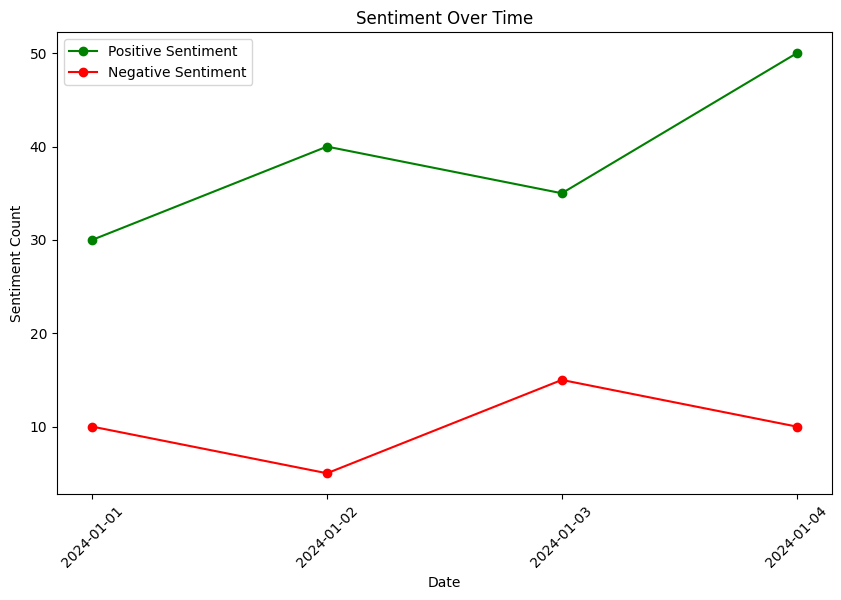

In [34]:
dates = ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04']
positive_sentiment = [30, 40, 35, 50]
negative_sentiment = [10, 5, 15, 10]
# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, positive_sentiment, label='Positive Sentiment', color='green', marker='o')
plt.plot(dates, negative_sentiment, label='Negative Sentiment', color='red', marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()
